## Assignment - 4 4/20/2024

## Reddit webscrappin

In [1]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


## Authentication

In [2]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="xq8tk6QV4JeTwIldOa7NVw",
    client_secret="wdyfErjq7E_JDsWCHnz3Tx6iU1ESJg",
    user_agent=user_agent
)

In [3]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Get Trending Topic from your Subreddit

## The "Iphone" subreddit channel will be use for this project

In [4]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("Iphone").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Weekly 'What Should I Buy' and Order/Shipping Thread
1ca7bu6
AutoModerator
1713781810.0
2
1.0
https://www.reddit.com/r/iphone/comments/1ca7bu6/weekly_what_should_i_buy_and_ordershipping_thread/
0


## Get total comment in Subreddit

In [5]:
headlines = set()
for submission in reddit.subreddit("Iphone").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

957


## Create a dataframe from the scrapped data

In [6]:
Iphone_df = pd.DataFrame(headlines)
Iphone_df.head()

,0
0,Cannot connect apple earpods to iPhone via a d...
1,Apple should put Lyrics on the side?
2,What does this do/mean? Keeps popping up. Virus?
3,Iphone 14 ios 17 .. I have been getting these ...
4,Message disappeared


In [7]:
Iphone_df.head()

,0
0,Cannot connect apple earpods to iPhone via a d...
1,Apple should put Lyrics on the side?
2,What does this do/mean? Keeps popping up. Virus?
3,Iphone 14 ios 17 .. I have been getting these ...
4,Message disappeared


In [78]:
Iphone_df.columns

RangeIndex(start=0, stop=1, step=1)

In [79]:
Iphone_df.columns = ['Titles']

In [80]:
Iphone_df.head()

,Titles
0,How can I manage concurrency between read and ...
1,Structuring Schema Design for two collections
2,MongoDB Community Operator for replicaset in k...
3,HELP! Can someone guide me to use this DataSet...
4,An undocumented issue on mongodb session.withT...


In [81]:
Iphone_df.Titles.duplicated().sum() 

0

In [82]:
# Import necessary libraries
import re

# Define function to clean text
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove @mentions
    text = re.sub(r'#', '', text)  # Remove the '#' symbol
    text = re.sub(r'RT[\s]+', '', text)  # Remove RT
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove hyperlinks
    text = re.sub(r':', '', text)  # Remove colons
    return text

# Apply cleaning function to "Titles" column and store the result
Iphone_df["Titles"] = Iphone_df["Titles"].apply(cleanTxt)

# Display cleaned text
Iphone_df.head()

,Titles
0,How can I manage concurrency between read and ...
1,Structuring Schema Design for two collections
2,MongoDB Community Operator for replicaset in k...
3,HELP! Can someone guide me to use this DataSet...
4,An undocumented issue on mongodb session.withT...


## Next we have to remove emoji & Unicode from the reddit data

In [83]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
Iphone_df["Titles"]= Iphone_df["Titles"].apply(remove_emoji)

#Show the clean text
Iphone_df.head()

,Titles
0,How can I manage concurrency between read and ...
1,Structuring Schema Design for two collections
2,MongoDB Community Operator for replicaset in k...
3,HELP! Can someone guide me to use this DataSet...
4,An undocumented issue on mongodb session.withT...


## install textblob

In [84]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [85]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

## Create a function to get the subjectivity

In [86]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
Iphone_df['Subjectivity'] = Iphone_df['Titles'].apply(getSubjectivity)
Iphone_df['Polarity'] = Iphone_df['Titles'].apply(getPolarity)

#Now display data
Iphone_df.head()

,Titles,Subjectivity,Polarity
0,How can I manage concurrency between read and ...,0.0,0.0
1,Structuring Schema Design for two collections,0.0,0.0
2,MongoDB Community Operator for replicaset in k...,0.0,0.0
3,HELP! Can someone guide me to use this DataSet...,0.0,0.0
4,An undocumented issue on mongodb session.withT...,0.0,0.0


## Group the range of Polarity to different categories

In [87]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
Iphone_df["Insight"] = Iphone_df["Polarity"].apply(getInsight)

Iphone_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,How can I manage concurrency between read and ...,0.000000,0.000000,Neutral
1,Structuring Schema Design for two collections,0.000000,0.000000,Neutral
2,MongoDB Community Operator for replicaset in k...,0.000000,0.000000,Neutral
3,HELP! Can someone guide me to use this DataSet...,0.000000,0.000000,Neutral
4,An undocumented issue on mongodb session.withT...,0.000000,0.000000,Neutral
5,New to MongoDB and need help,0.454545,0.136364,Positive
6,mongodb atlas connection error,0.000000,0.000000,Neutral
7,Seeking Advice Running Migrations Through Pipe...,0.000000,0.000000,Neutral
8,MongoDB upgrade,0.000000,0.000000,Neutral
9,I got an error that set up Alias Shortcuts for...,0.000000,0.000000,Neutral


## Data Visualization

In [88]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

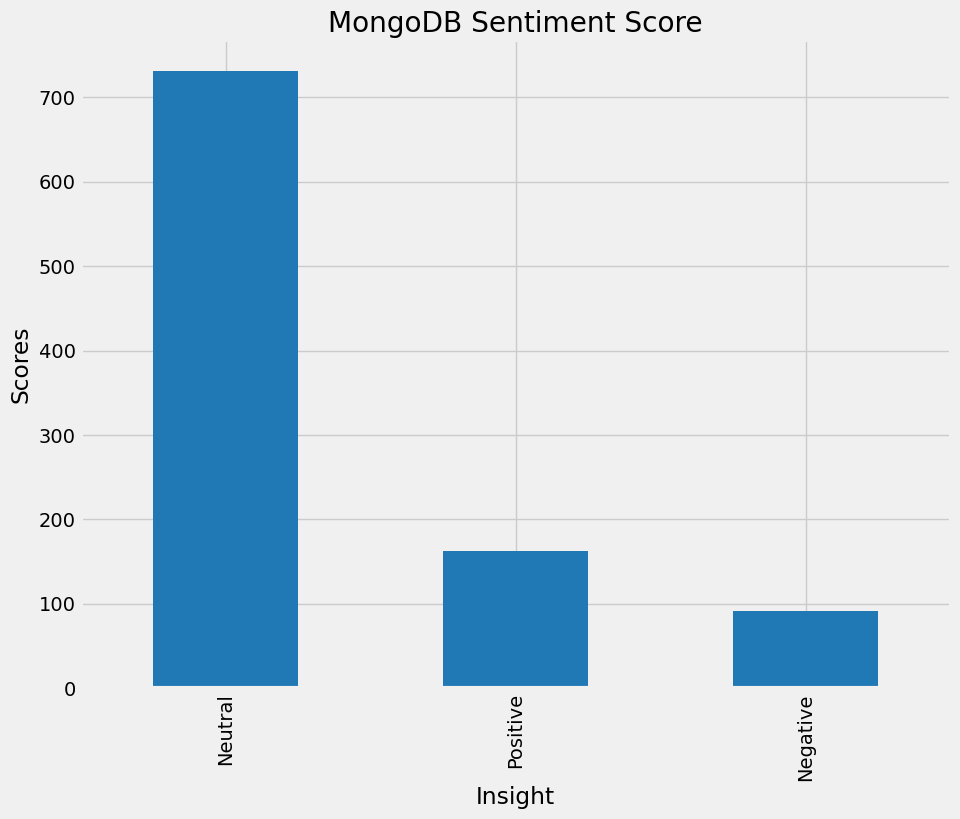

In [89]:
#Plot the values count of sentiment
plt.title("Iphone Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
Iphone_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## Wordcloud

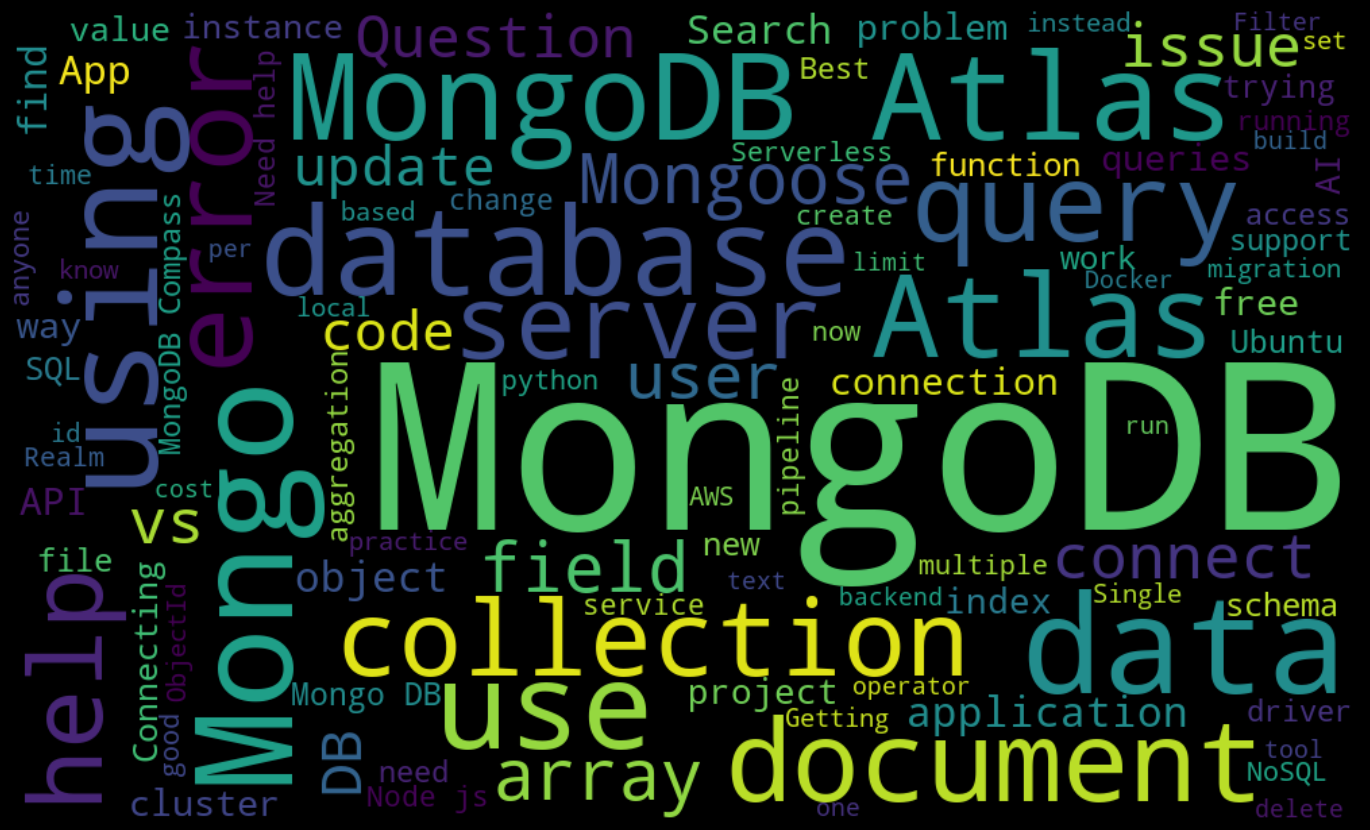

In [90]:
text = ' '.join( [twts for twts in Iphone_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");